# Assignment 10
## name : rocky kim 
## student id : 20152424
## github link :[https://github.com/Epicevent/assignment10](https://github.com/Epicevent/assignment10 ) 

# get training data via given code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1
print (np.shape(list_image_train[:,0]))
print (np.shape(list_label_train))
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1



(784,)
(60000,)


# model for binary classfier



 feature funtion for a image


 def>  $\mathbb{M}$ : set of  M images
 
 
 $$ 
 \mathbb{M} = \{m_1 , m_2 , \cdots , m_M \}
 $$ 
 



# random vector drawn from a normal distribution

 $$
 r_i  \sim \mathcal{N}(\mu,\,\sigma^{2})\ 
 $$
 
 
 $$
 r_i \in \mathbb{R}^{784}
 $$
 
  
 $$
 (\mu,\,\sigma^{2}) = (0, 1)
 $$

In [2]:
def make_random_vector(numfeature): # input must be np.array :dtype int
    r =  np.empty((numfeature,size_row * size_col), dtype=float)
    mu, sigma = 0, 1 # mean and standard deviation
    for i in range(numfeature):
        r[i,:] = np.random.normal(mu, sigma, size_row * size_col)#r_i^T 
    return r,numfeature


#  Domain and codomain of feature function 


let number of feature is p


$$ 
f :  \mathbb{M} \to \mathbb{R}^{p}   
$$




# definition of feature function for training


let $$ x \in M $$ be a vector that represent an image of the size 28 × 28 


$$   
x = (x_1 ,x_2 , \cdots , x_{784})   
$$


$$ 
f(x) = (f_0(x), \cdots , f_{p-1}(x) ) 
$$


$$ 
f_i : \mathbb{R}^{784} \to \mathbb{R} 
$$


$$
f_i(x) = r_i^T x 
$$

In [3]:
def feature(i,r, image):
    '''
       i : feature index 0~ p-1
       r : np.array shape : ( p, 784) 
       image : np.array shape : ( 784 , )
       return \sum{k=0}^783 {r[i,k]*image[k]}
    '''
    return np.dot(r[i,:],image)

# Model parameter and model for getting partitioning function

# definition of colunm vector 




$$
     a_j=
  \left[ {\begin{array}{ccccc}
   f_j(m_1) \\
   f_j(m_2) \\
   \vdots \\
   f_j(m_M) 
  \end{array}}  \right]
$$




# definition of image feature Matrix A

where p is number of feature 

$$
   A=
  \left[ {\begin{array}{ccccc}
   a_0 & a_1 & \dots & a_{p-1} 
  \end{array} } \right]
$$
  
 


# definition of label vector b for digit 'k'


$$
k \in \{0,1,2,3,4,5,6,7,8,9\}
$$


$$
 y^i_k={\begin{cases}
    1, & \text{if } m_i \text{ is image of digit 'k' }.\\
   -1, & \text{otherwise}.
\end{cases}}
$$


$$
b_k=  \left[ {\begin{array}{ccccc}
y_k^1 \\
 y_k^2 \\
   \vdots \\
   y_k^N 
  \end{array} } \right]
$$

# definition of parameter Matrix B

where p is number of feature 

$$
   B=
  \left[ {\begin{array}{ccccc}
   b_0 & b_1 & \dots & b_{9} 
  \end{array} } \right]
$$
  

In [4]:
def makeA( imagelist,r,num_feature ): 
    '''
        imagelist : np.array with shape (784, 60000)
        return . transeposed array with shape (60000,  num of feature)
    '''
    Arows = np.shape(imagelist)[1]  # since A's shape is ( shape(imagelist.T) )
    Acols = num_feature
    A = np.empty((Arows , Acols), dtype=float)
    for i in range( Arows ):
        for j in range(Acols):
                A[i,j] = feature(j ,r,imagelist[:,i]) 
    return A


def makeb (labellist):
    '''
        labellist : np.array with shape (60000,)
        return :column vector with shape (60000,10) and value in {1, -1}
    '''
    numdata = np.shape(labellist)[0]
    B = np.zeros((numdata,10),dtype= float ) # to caculate with float matrix
    label = labellist.reshape((numdata, 1))
    for k in range(10):
  
        condlist = [label==k, label!=k]
        choicelist = [1, -1]
        B[:,k] = np.select(condlist, choicelist).reshape(numdata,)

    return B

# model parameter 

${\theta} \in {\mathbb{R}^{N \times 10}}$ denotes model parameter


$N (= p )$ is number of feature 


$k \in \{0 , \cdots ,9\}$ is label 


$$
\theta_k =  \left[ {\begin{array}{ccccc}
  \theta^1_k  \\
  \theta^2_k \\  
  \vdots  \\
  \theta^N_k
  \end{array} } \right] 
$$



$$
\theta =  \left[ {\begin{array}{ccccc}
  \theta^1_0 \cdots  \theta^1_k \cdots  \theta^1_9 \\
  \theta^2_0 \cdots  \theta^2_k \cdots \theta^2_9 \\  
  \vdots \cdots \theta^i_k \cdots \vdots \\
  \theta^N_0 \cdots \theta^N_k \cdots  \theta^N_9
  \end{array} } \right] 
$$



# the least square problem
   
   find $\theta$ that minimize 

$$ 
\sum_{k=0}^{9}{\| A\theta_k - b_k   \|^2} = \sum_{k=0}^{9}{\sum_{j=1}^{N}{(r_{jk})^2}} \quad where, \quad r_{jk} = y^j_k -\tilde{f}(x_j)
$$

# that becomes this equation


$$A\theta \approx B $$



Object : minimze following term


$$\sum_{k=0}^{9}{\| A\theta_k - b_k   \|^2}=\| A\theta - B\|^2 $$

# QR decomposition of A
More generally, we can factor a complex $m \times n$ matrix $A$, with $m≥n$, as the product of an $m\times m$ unitary matrix $Q$ and an $m\times n$ upper triangular matrix $R$.  As the bottom ($m − n$) rows of an $m\times n$ upper triangular matrix consist entirely of zeroes, it is often useful to partition $R$, or both $R$ and $Q$:
$$
  A = QR = Q \begin{bmatrix} R_1 \\ 0 \end{bmatrix}
    = \begin{bmatrix} Q_1, Q_2 \end{bmatrix} \begin{bmatrix} R_1 \\ 0 \end{bmatrix}
    = Q_1 R_1,
$$




# Back substitution to solve the problem


let 


$$\text{R}_{ij} = R_1(i,j)$$   


let


$$Q_1^TB = q =\left[ {\begin{array}{ccccc}
   q_{1,0} \cdots q_{1,9} \\
   q_{2,0}  \cdots q_{2,9}\\
   \vdots \cdots \vdots \\
   q_{N,0} \cdots q_{N,9}
  \end{array} } \right]$$ 
 
 
row vector q_i and theta_i

$$
q_i = \left[ q_{i,0}  \cdots q_{i,9} \right]
$$


$$
\theta_i = \left[ \theta_{i,0}  \cdots \theta_{i,9} \right]
$$

$$
( R_1) \left[ {\begin{array}{ccccc}
   \theta_1 \\
   \theta_2 \\
   \vdots \\
   \theta_N
  \end{array} } \right] = \left[ {\begin{array}{ccccc}
   q_1 \\
   q_2 \\
   \vdots \\
   q_N
  \end{array} } \right] 
$$ as


$$
\begin{aligned}
   \text{R}_{11} \theta_{1} +\text{R}_{12} \theta_{2}+ \cdots + 
   \text{R}_{1,N-1}\theta_{N-1} + \text{R}_{1N}\theta_{N}  &= q_1 \\
   \vdots \\
   \text{R}_{N-1,N-1} \theta_{N-1} + \text{R}_{N-1,N}\theta_{N}&= q_{N-1}\\
   \text{R}_{N,N}\theta_{N}&= q_{N}
\end{aligned}
$$



# get sudo solution of Back substitution


Of course, this equation may not have solution


( if some digonal element is zero )


but the equation implies the equation of least square plobrem .


from last equation we get 


$$  
  \theta_N=\begin{cases}
    q_{N}/R_{NN} & \text{if $R_{NN} \neq 0$ }.\\
    0 & \text{if $R_{NN}=0$ }.
  \end{cases}
$$


I from 2nd to last equation we get


$$
  \theta_{N-1}=\begin{cases}
    (q_{N-1} - R_{N-1,N}\theta_N)/R_{N-1,N-1} & \text{if $R_{N-1,N-1} \neq 0$ }.\\
    0 & \text{if $R_{N-1,N-1}=0$ }.
  \end{cases}
$$



I continue to get $\theta_{N-2},\theta_{N-3},\cdots,\theta_{1}$ 




In [5]:
def solve_model_parameter(A,b):

    numfeature = np.shape(A)[1]
    Q ,R = np.linalg.qr(A)
    q =np.matmul(Q.T, b)
    theta_matrix = np.zeros((numfeature,10),dtype=float)
    for k in range(10):
        for i in range(numfeature):
            n = numfeature - i # 1<=n <= numfeature (decreasing)
            if R[n-1,n-1] == 0 : # R_(n,n)
                theta_matrix[n-1,k] = 0 # theta_vector_(n,1)
            else:
                rthetasum =0 
                for j in range (numfeature-n):
                    l = numfeature- j # 1<= l <=N ( decreasing )
                    rthetasum += R[n -1 ,l-1]*theta_matrix[l-1,k]
                theta_matrix[n-1,k] = (q[n-1,k] - rthetasum)/R[n-1,n-1]
    return theta_matrix



# Try with varying the number of parameters p with thestandard deviation σ = 1 of the random feature vector r : 1,2, ... ,1024

In [6]:
r_field,r_max = make_random_vector(1024)
def getr(p_ndarray):
    len_r_list = np.shape(p_ndarray)[0]
    r_list = []
    index_for_access_r_field = 0
    ind = index_for_access_r_field 
    for p in p_ndarray:
        p = int(p)
        if ind+p<len_r_list:
            nind =ind + p
        else:
            ind = 0
            nind = p
        r_list.append(r_field[ind:ind+p,:]) # reuse aleady initialized data
        ind=nind
    return r_list,p_ndarray   

In [7]:
def train_with_varying_p_to_get_bestF1score( training_function ): #training_function int \to float and it is havvy       
    num_piece =10
    s_point = 0
    e_point = num_piece # the e_point is ommited ! 
    bestConfusionmatrix = np.zeros((10,10),dtype=int) 
    for level in range(4):
        level = np.float(level)
        x = range(s_point,e_point)
        prev_s_point = s_point
        friction_of_power = np.power(num_piece,(-level))
        x_exp =[  np.power(2,(friction_of_power*i)) for i in x ] 
        x_caculate =np.array(x_exp,dtype = int) 
        list_targetset = f(x_caculate)
        y = list_targetset[1] 
        prev_index = np.argmax(y) 
        if type(list_targetset[0][prev_index]) is np.ndarray:
            bestConfusionmatrix = ( list_targetset[0][prev_index])
        bestF1score = float(y[prev_index])
        bestP = x_caculate[prev_index]
        x_plot = x
        plt.subplot(2, 2, level+1)
        plt.title("level="+str(int(level))+ ":f(2^("+"{:.2f}".format(friction_of_power)+")*x)" )
        plt.plot(x_plot,y)
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        
        s_point= int(num_piece*(prev_s_point+prev_index-0.5))
        e_point = int(num_piece*(prev_s_point+prev_index+0.5))
        
    return bestConfusionmatrix,bestF1score,bestP
    

thegraph is -x^2 + 800x
peak value is 160000.00 at x= 400


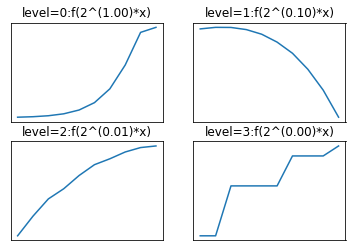

In [8]:
# test code for varify above code
f = (lambda x : (x*0,-np.power(x,2) + 800*x ))
bcm,f1,p =train_with_varying_p_to_get_bestF1score(f)
print("thegraph is -x^2 + 800x")
print("peak value is {:.2f} at x= {:d}".format(f1,p))

plt.show()

# The partitioning function

$$\tilde{f} : \mathbb{R}^{ 784}\to \mathbb{R^{10}}$$ 

is defined by 
inner product of feature and model parameter

again 

$$
\theta_k =  \left[ {\begin{array}{ccccc}
  \theta^1_k  \\
  \theta^2_k \\  
  \vdots  \\
  \theta^p_k
  \end{array} } \right] 
$$



$$
\theta =  \left[ {\begin{array}{ccccc}
  \theta^1_0 \cdots  \theta^1_k \cdots  \theta^1_9 \\
  \theta^2_0 \cdots  \theta^2_k \cdots \theta^2_9 \\  
  \vdots \cdots \theta^i_k \cdots \vdots \\
  \theta^N_0 \cdots \theta^N_k \cdots  \theta^N_9
  \end{array} } \right] 
$$


$$
   \tilde{f}(x; \theta) =\left[ {\begin{array}{cccccc} 
   f(x)\theta_0  \quad
   f(x)\theta_1  \quad
   f(x)\theta_2  \quad
   f(x)\theta_3  \quad
   f(x)\theta_4  \quad
   f(x)\theta_5  \quad
   f(x)\theta_6  \quad
   f(x)\theta_7  \quad
   f(x)\theta_8  \quad
   f(x)\theta_9 \end{array} } \right]=
   \left[ {\begin{array}{cccccc} 
   \phi_0(x)  \quad
   \phi_1(x)  \quad
   \phi_2(x)  \quad
   \phi_3(x)  \quad
   \phi_4(x)  \quad
   \phi_5(x)  \quad
   \phi_6(x)  \quad
   \phi_7(x)  \quad
   \phi_8(x)  \quad
   \phi_9(x)  \end{array} } \right]
$$




$$
    A \theta = 
   \left[ {\begin{array}{ccccc}
  \tilde{f}(x_1) \\
   \tilde{f}(x_2) \\  
  \vdots \\
    \tilde{f}(x_N)
  \end{array} } \right]
$$

#  classifier




$$\hat{f}(x) = \underset{i}{argmax}{(  \phi_i(x) )}$$ 



In [9]:
def imagetraining_and_caculateresult(r,numfeature):
    A_train = makeA (list_image_train,r,numfeature)
    b_train = makeb (list_label_train)
    model_parameter =solve_model_parameter(A_train,b_train)
    A_test = makeA (list_image_test,r,numfeature)
    partitioning_matrix = np.matmul(A_test,model_parameter) # test input partition 
    # : if x < 0 return 1 else return 1
    classifier_vec= np.argmax(partitioning_matrix ,axis=1)
    classifier_vec = classifier_vec.reshape(num_test,1)
    return classifier_vec ,list_label_test.reshape((num_test,1))


# Definition of Confusion Matrix

let classifier_vec and label_vector  c, l ,respectivly

let number of test be n

$$
    \mathbb{c} = \left[ \begin{array}{ccccc}
     \mathbb{c}_1 \\
     \vdots \\
     \mathbb{c}_n
    \end{array} \right]
$$


$$
    \mathbb{l} = \left[ \begin{array}{ccccc}
     \mathbb{l}_1 \\
     \vdots \\
     \mathbb{l}_n
    \end{array} \right]
$$


let define confusion function deltha 


let
$$
i,j \in \mathbb{N}_n = \{ 1, 2,\cdots,n \}
$$


define


$$
\delta^i_j = \#\{k \in \mathbb{N}_n| \mathbb{c}_k = i , \mathbb{l}_k = j\}
$$



let confusion matrix be C

$$
C_{i,j} = \delta^i_j
$$

In [10]:
def make_confusion_matrix(cv,lv):
    C = np.zeros((10,10),dtype= int)
    for i in range(10):
        for j in range(10):
            C[i,j] = np.sum((cv== i) & (lv == j) )# deltha function i,j
    return C
cv,lv = (imagetraining_and_caculateresult(r_field,411))
print(np.sum(cv==lv))
print(make_confusion_matrix(cv,lv))

8521
[[ 937    0   17    6    0   22   17    5   16   18]
 [   1 1106   59   16   24   16   10   37   54   12]
 [   2    2  806   20    9    3   12   15    8    3]
 [   3    3   32  884    1   91    0   10   29   14]
 [   2    1   19    3  874   18   17   21   29   70]
 [  11    0    0   14    4  611   17    0   43    0]
 [  13    5   37   12    9   21  876    2   17    1]
 [   2    2   16   21    1   15    0  877   11   74]
 [   7   16   40   23   11   74    9    4  742    9]
 [   2    0    6   11   49   21    0   57   25  808]]


# F1 score 

$$ 
    F_1 = \left(\frac{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}}{2}\right)^{-1} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}
$$


# define functions for caculateF1score among varing p 

In [11]:
def calculate_f1score_of_confusion_matrix(confusion_matrix):
    if np.shape(confusion_matrix)!=(10,10):
        return 0 
    f1vec = np.zeros(10,dtype=float)
    for i in range(10):
        num_true_positive = confusion_matrix[i,i]
        if num_true_positive == 0 :
            continue
        prcif = confusion_matrix[:,i] 
        local_precision = num_true_positive/np.sum(prcif)
        rcf = confusion_matrix[i,:]
        local_recall= num_true_positive / np.sum(rcf)
        f1vec[i] = 2*local_recall*local_precision / (local_precision + local_recall) 
    rms = np.sqrt(np.mean(f1vec**2))# we use root mean square of all f1score of each label 0,1,...,9
    return rms

def caculateF1score(cv,lv):
    C = make_confusion_matrix(cv,lv)
    return C , calculate_f1score_of_confusion_matrix(C)

In [12]:
def  caculateF1score_among_varing_p(r_list,ndarray_p):
    len_r_list = len(r_list)
    ret_list = list()
    ret_list.append(np.zeros((len_r_list,10,10),dtype=int))# confusion matrix
    ret_f1score=np.zeros(len_r_list,dtype=float)
    ret_list.append(ret_f1score)
    for i in range(len_r_list):
        r= r_list[i]
        numfeature = ndarray_p[i]
        classifier_vec , b_test = imagetraining_and_caculateresult(r,numfeature)
        reti = caculateF1score(classifier_vec , b_test)
        print(reti[0] )# after 40 times printing the confusionmatrix with varying p
        ret_list[0][i,:]= reti[0]
        ret_list[1][i]= reti[1]
    return ret_list

# Present the best F1 score among the results with different number of parameters p = 1,2, ...,1024

warning : following code is very time cosumming !! 
description : first it get maximum f1 among p= 1,2,4,8,16,32,64,128,256,512,1024
             assume p=128 we get max
             second it get maximum f1 among 
             

$$p= 2^{6.5},\cdots,2^{7},\cdots,2^{7.5}$$ 
         
         

assume
             
             
$$p=2^{7.3}$$
             
             
 we get max
 third it get maxium f1 among 

             
$$p = 2^{7.3-0.05},\cdots,2^{7.3},\cdots,2^{7.3+0.05}$$
             

assume 


$$p=2^{7.28}$$
             

we get max 
 last it get maximum f1 among


$$p=  2^{7.28-0.005},\cdots,2^{7.25},\cdots,2^{7.28+0.005}$$



number of caculation : 40times ( each level it train and evaluation 16times ) 

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [716 848 963 976 861 671 908 841 862 854]
 [  0   0   0   0   0   0   0   0   0   0]
 [264 287  69  34 121 221  50 187 112 155]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[[ 10  10  17  11   5  12  13   1   9  12]
 [  6   4   3   2   5   4   1   1   0   5]
 [193  97 124  21  34  34  51  65  22  85]
 [372 374 175 701 719 577 321 116 613 561]
 [  0   1   0   3   3   1   0   0   0   0]
 [ 32  19  35  44  43  73  32  10  36  32]
 [  0   0   0   0   0   0   0   0   0   0]
 [367 630 678 228 173 191 540 835 294 314]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[[169   1  14  12   4  15   4   7   1   7]
 [ 50 550 252 128 189  58  52 129 331 240]
 [ 89  10 124  38  15  19  24  98   4  45]
 [ 99  12

[[ 937    0   17    6    1   27   20    4   17   17]
 [   1 1104   65   16   25   16    9   39   57   12]
 [   3    2  795   20    7    7    9   18    7    3]
 [   2    2   29  879    2   92    0   11   35   15]
 [   2    1   21    3  866   18   19   15   26   67]
 [   9    0    0   18    1  605   15    1   38    1]
 [  17    5   37   10   11   23  878    1   19    1]
 [   1    2   20   25    1   18    0  883   15   71]
 [   7   19   41   23   12   69    8    4  737    8]
 [   1    0    7   10   56   17    0   52   23  814]]
[[ 935    0   17    5    1   22   19    3   15   17]
 [   1 1105   64   15   22   17    9   38   57   13]
 [   2    2  805   19    9    6   11   18    7    3]
 [   2    2   28  882    1   91    1    9   29   14]
 [   2    1   20    3  871   18   16   14   29   67]
 [  12    0    0   15    1  605   15    1   41    0]
 [  16    5   33   11   10   25  877    2   17    2]
 [   1    2   18   23    1   21    0  886   15   73]
 [   7   18   40   24   12   70   10    4  74

[[ 938    0   19    6    0   26   19    6   15   17]
 [   0 1107   64   19   25   15    8   36   54   11]
 [   2    3  806   20    8    5    7   17    7    5]
 [   2    2   26  880    2   92    1    7   34   15]
 [   1    1   21    3  867   19   19   16   29   59]
 [  10    1    0   16    2  613   18    3   37    0]
 [  16    5   32   12   14   23  877    2   16    1]
 [   1    2   20   24    1   17    0  887   16   73]
 [   8   14   40   20   10   67    9    5  744   11]
 [   2    0    4   10   53   15    0   49   22  817]]
[[ 938    0   19    6    0   26   19    6   15   17]
 [   0 1107   64   19   25   15    8   36   54   11]
 [   2    3  806   20    8    5    7   17    7    5]
 [   2    2   26  880    2   92    1    7   34   15]
 [   1    1   21    3  867   19   19   16   29   59]
 [  10    1    0   16    2  613   18    3   37    0]
 [  16    5   32   12   14   23  877    2   16    1]
 [   1    2   20   24    1   17    0  887   16   73]
 [   8   14   40   20   10   67    9    5  74

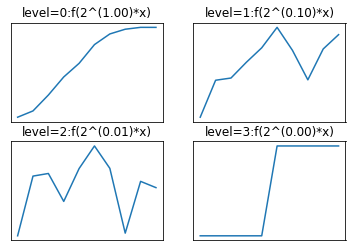

In [13]:
f =  (lambda x : caculateF1score_among_varing_p(*getr(x)))
confusionmatrix,F_1score,p  = train_with_varying_p_to_get_bestF1score(f)# printing '(10000,)' 64 times and get best p ... 
print("when p ={:d} , F_1 is largest :{:f}".format(p,F_1score))

# when p = 256 , f1 = 0.851834 , Confusion Matrix

In [14]:
print(confusionmatrix)# Confusion Matrix 

[[ 939    0   19    6    0   26   19    6   15   17]
 [   0 1107   63   19   25   15    8   37   53   10]
 [   2    3  806   19    7    5    7   17    7    5]
 [   2    2   27  881    2   94    1    7   34   15]
 [   1    1   20    3  870   19   18   18   27   62]
 [  10    2    0   16    2  610   18    3   36    0]
 [  16    5   32   12   13   24  878    2   16    1]
 [   1    1   21   24    1   17    0  884   17   73]
 [   8   14   40   20   10   67    9    5  747   11]
 [   1    0    4   10   52   15    0   49   22  815]]
